In [1]:
import csv
import sys

import matplotlib.pyplot as plt

In [7]:
path = "/Users/psantos/QCircuits_BenchTest/circuits/"

circuitID = "510"

algorithms = ["IS","BD","BD_MIS"]

istate = "0"

ostate = "0"

samples = "26"

threads = "8"

files = [path+circuitID+"/circuit_"+circuitID + ".data_stats_" + alg + "_" + istate + "_" + ostate + "_" + samples + "_" + threads + ".csv" for alg in algorithms]

In [8]:
# Read CSVs

data = {}
for ndxfile, file in enumerate(files):
    alg = algorithms[ndxfile] 
    data[alg] = {}
    with open(file) as csvfile:
        csvreader = csv.reader(csvfile, delimiter=',')
        for rowndx, row in enumerate(csvreader):
            #print (row)
            if rowndx==0: continue     # 1st row is header
            elif rowndx==1:
                true_w = complex(float(row[0]),float(row[1]))
                data[alg]["true_w"] = true_w            
            elif rowndx==2:     # 3rd row is header
                dataTitles = [s.strip() for s in row]
                # add 3 more attributes
                dataTitles.append ("variance")
                dataTitles.append ("L2")
                dataTitles.append ("efficiency")
                for title in dataTitles:
                    data[alg][title] = [] 
            else:
                for titlendx, title in enumerate(dataTitles):
                    if titlendx <7:
                        data[alg][title].append(float(row[titlendx])) 
                    elif titlendx == 7:   # variance
                        variance = float(row[5])+float(row[6])
                        data[alg]["variance"].append(variance) 
                    elif titlendx == 8:   # L2
                        estimate_w = complex(float(row[3]),float(row[4]))
                        L2 = abs(true_w - estimate_w)
                        data[alg]["L2"].append(L2)
                    elif titlendx == 9:   # efficiency
                        time = (float(row[1]))
                        if variance > 0.:
                            efficiency = 1./(time*variance)
                        else:
                            efficiency = sys.float_info.max
                        data[alg]["efficiency"].append(efficiency)
    #print (dataTitles)
    

In [9]:
## Plot allows specification of dependent and in dependent variables
# choose each from
'n_samples', 'time', 'n_paths', 'estimateR', 'estimateI', 'varianceR', 'varianceI', 'variance', 'L2', 'efficiency'
# independent variable
X_var = 'n_samples'
# dependent variable
Y_var = 'efficiency'

# log X axis ?
log_X_axis = False
# log Y axis ?
log_Y_axis = True


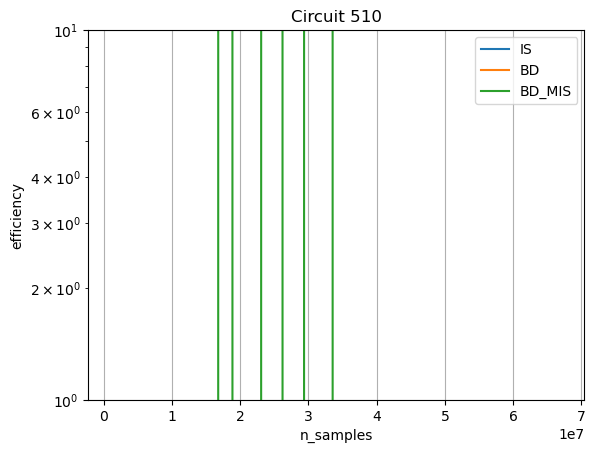

In [10]:
fig, ax = plt.subplots()

if log_X_axis:
    # convert x-axis to Logarithmic scale
    plt.xscale("log")
else:
    plt.xscale("linear")


if log_Y_axis:
    # convert y-axis to Logarithmic scale
    plt.yscale("log")
else:
    plt.yscale("linear")

# for each algorithm
for alg in algorithms:
    # Data for plotting
    X = data[alg][X_var]
    Y = data[alg][Y_var]

    ax.plot(X, Y, label = alg)

ax.set(xlabel=X_var, ylabel=Y_var,
       title='Circuit ' +  circuitID)
ax.grid()
ax.legend ()

#fig.savefig("test.png")
plt.show()

In [6]:
print ("That\'s all, folks!")

That's all, folks!
